In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# 加载数据
data = pd.read_csv('../balanced_train_data.csv')
# 分离特征和目标变量
X = data.drop(columns=['churn'])
y = data['churn']
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# 定义逻辑回归类
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None
        self.losses = []
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y, y_pred):
        # 计算对数损失
        m = len(y)
        loss = -1 / m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return loss

    def fit(self, X, y):
        # 初始化参数
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for i in range(self.max_iter):
            # 计算预测值
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            # 计算梯度
            dw = 1 / m * np.dot(X.T, (y_pred - y))
            db = 1 / m * np.sum(y_pred - y)

            # 更新参数
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # 记录损失
            loss = self.compute_loss(y, y_pred)
            self.losses.append(loss)
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_pred]
    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)
    def plot_loss_curve(self):
        """
        绘制迭代损失曲线，并展示最后一次损失值
        """
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.losses) + 1), self.losses, label='Training Loss', color='blue')
        plt.xlabel('Iteration')
        plt.ylabel('Log Loss')
        plt.title('Loss Curve of Logistic Regression with Gradient Descent')
        plt.legend()
        plt.grid()

        # 获取最后一次损失值
        final_loss = self.losses[-1]
        # 在图中合适位置添加文本显示最后一次损失值
        plt.text(len(self.losses) * 0.8, final_loss * 1.1, f'Final Loss: {final_loss:.4f}', fontsize=12)

        plt.tight_layout()
        plt.show()

    def plot_roc_curve(self, X_test, y_test):
        """
        绘制 ROC 曲线
        """
        y_pred_proba = self.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})', color='blue')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve for Logistic Regression')
        plt.legend(loc='lower right')
        plt.grid()
        plt.tight_layout()
        plt.show()



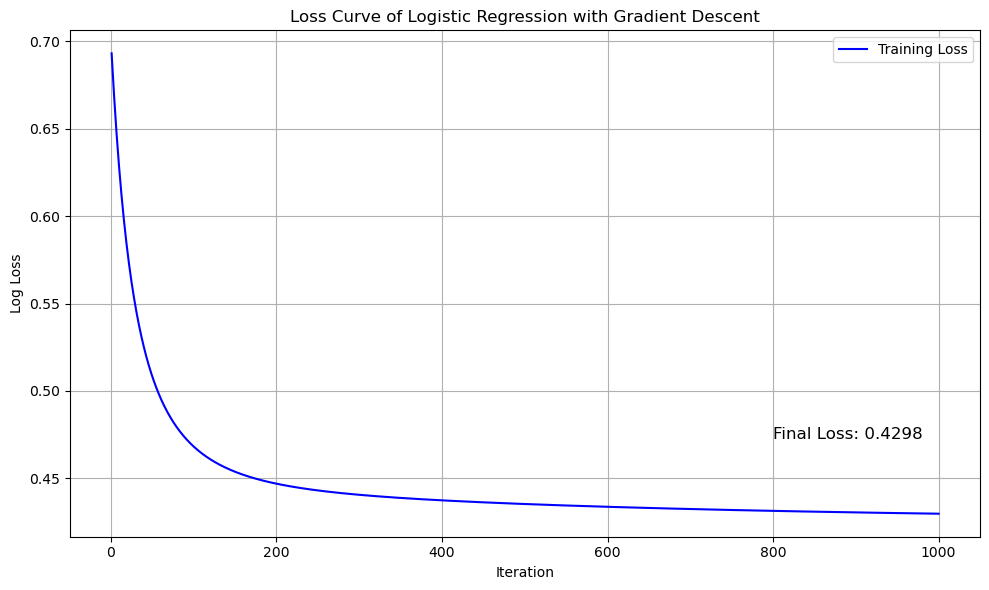

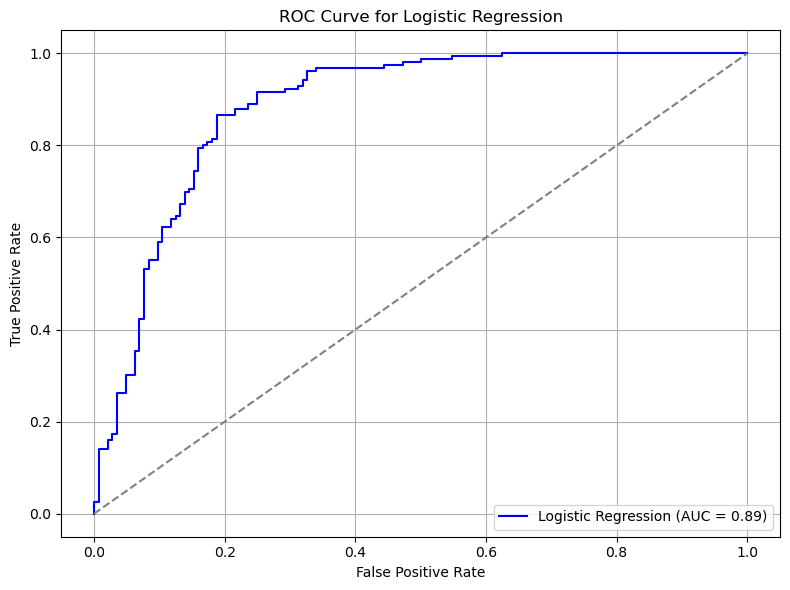

In [2]:
# 生成随机的二分类数据集
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建逻辑回归模型实例并进行训练
model = LogisticRegressionGD(learning_rate=0.01, max_iter=1000)
model.fit(X_train, y_train)

# 绘制迭代损失曲线
model.plot_loss_curve()

# 绘制 ROC 曲线
model.plot_roc_curve(X_test, y_test)

In [3]:
from sklearn.metrics import accuracy_score, f1_score

y_pred = model.predict(X_test)

# 计算F1值
f1 = f1_score(y_test, y_pred)
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)

# 打印F1值和准确率
print(f"F1值: {f1:.4f}")
print(f"准确率: {accuracy:.4f}")

F1值: 0.7850
准确率: 0.7900
